In [3]:
Copyright (c) [2018] [Prabhash Kumar Jha and Isheeta Jha] 

using Images
using PyPlot

# Load images from the yale_faces directory and return a MxN data matrix,
# where M is the number of pixels per face image and N is the number of images.
# Also return the dimensions of a single face image and the number of all face images
function loadfaces()
data=Array{Float64,2}
facedim=zeros(2)
for j=1:38
    if(j<10)
    dir="yale_faces_png/yaleBs0$j"
    else
    dir="yale_faces_png/yaleBs$j"
    end
for i=1:20
    if(i<10)
    file="0$i.png"
    else
    file="$i.png"
    end
filename="../data-julia/$dir/$file"
temp=PyPlot.imread("$filename")
facedim[1]=size(temp,1)#no. of rows of image
facedim[2]=size(temp,2)#no. of columns of image
if(j==1 && i==1)
data=vcat(temp...)
        else
data=hcat(data,vcat(temp...))
        end
end
end
data=convert(Array{Float64,2},data)
facedim=convert(Array{Int},facedim)
n=size(data,2)  #no. of images
   # println(size(data))
  return data::Array{Float64,2},facedim::Array{Int},n::Int
end

# Apply principal component analysis on the data matrix.
# Return the eigenvectors of covariance matrix of the data, the corresponding eigenvalues,
# the one-dimensional mean data matrix and a cumulated variance vector in increasing order.
function computepca(data::Array{Float64,2})
mu=zeros(size(data,1))
#mean=sum(data,2)/(size(data,2))
mu=(mean(data,2))
data=data.-mu
F = svdfact(data)
U=F[:U] 
lambda=F[:S]
lambda=(lambda.^2)/(size(data,2))  
cumvar=zeros(size(lambda,1))
#variance is square of lambda/N
for i=1:size(lambda,1)
cumvar[i]=sum(lambda[1:i])
end 

   return U::Array{Float64,2},lambda::Array{Float64,1},mu::Array{Float64,2},cumvar::Array{Float64,1}
end

# Compute required number of components to account for (at least) 80/95 % of the variance
function computencomponents(cumvar::Array{Float64,1})
max_var=cumvar[end]
n80=0
n95=0
for i=1:size(cumvar,1)
    if(cumvar[i]>=0.80*max_var && n80==0)
        n80=i
    end
    if(cumvar[i]>=0.95*max_var && n95==0)
        n95=i
    end
end
  return n80::Int,n95::Int
end

# Display the mean face and the first 10 Eigenfaces in a single figure
function showfaces(U::Array{Float64,2},mu::Array{Float64,2},facedim::Array{Int})
figure()
subplot(3,4,1)
PyPlot.imshow(reshape(mu,facedim[1],facedim[2]),"gray",interpolation="none")
  axis("off")
title("Mean face")
for i=1:10
subplot(3,4,i+1)
PyPlot.imshow(reshape(U[:,i],facedim[1],facedim[2]),"gray",interpolation="none")
  axis("off")
title("Eigen face $i")
end
  return nothing::Void
end

# Fetch a single face with given index out of the data matrix. Returns the actual face image.
function takeface(data::Array{Float64,2},facedim::Array{Int},n::Int)
face=reshape(data[:,n],facedim[1],facedim[2])
println("face index",n)
  return face::Array{Float64,2}
end

# Project a given face into the low-dimensional space with a given number of principal
# components and reconstruct it afterwards
function computereconstruction(faceim::Array{Float64,2},U::Array{Float64,2},mu::Array{Float64,2},n::Int)
h=size(faceim,1)
w=size(faceim,2)
faceim=reshape(faceim,1,h*w) #make 1d image
projection=faceim*U[:,1:n] #calculate coefficients of each eigen vector
#println("\nProjection coefficients=",projection)
projection=vcat(projection...)
recon=U[:,1:n]*diagm(projection)
recon=sum(recon,2)+mu#reconstructed image will be sum of product of coefficients and respective principal components +mean face
recon=reshape(recon,h,w)
  return recon::Array{Float64,2}
end

function displayfaces(f5::Array{Float64,2},f15::Array{Float64,2},f50::Array{Float64,2},f150::Array{Float64,2},faceim::Array{Float64,2})

figure()
  subplot(221)
  imshow(f5,"gray",interpolation="none")
  axis("off")
  title("5 Principal Components")
  subplot(222)
  imshow(f15,"gray",interpolation="none")
  axis("off")
  title("15 Principal Components")
  subplot(223)
  imshow(f50,"gray",interpolation="none")
  axis("off")
  title("50 Principal Components")
  subplot(224)
  imshow(f150,"gray",interpolation="none")
  axis("off")
  title("150 Principal Components")
  gcf()
return nothing::Void
end






displayfaces (generic function with 1 method)

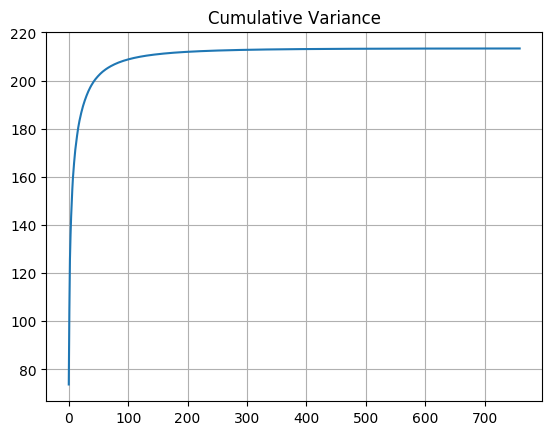

PyObject <matplotlib.text.Text object at 0x00000000382DEB70>

In [6]:

  # load data
  data,facedim,N = loadfaces()

  # compute PCA
  U,lambda,mu,cumvar = computepca(data)

  # plot cumulative variance
  figure()
  plot(cumvar)
  grid("on")
  title("Cumulative Variance")




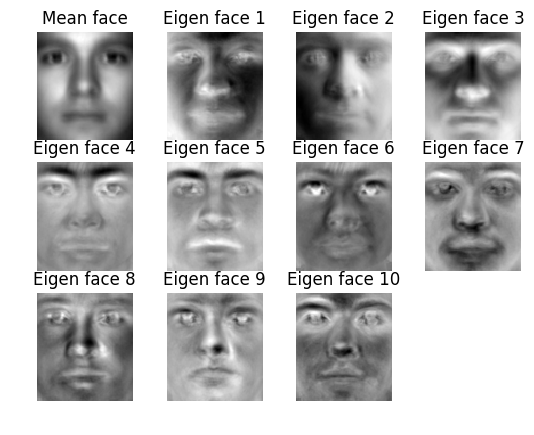

number of principal components required for 80% cum var is 12and 95% cum var is 54


In [8]:
  # compute necessary components for 80% / 95% variance coverage
  n80,n95 = computencomponents(cumvar)
  println("number of principal components required for 80% cum var is ",n80,"and 95% cum var is ",n95)
  # plot mean face and first 10 eigenfaces
  showfaces(U,mu,facedim)

 

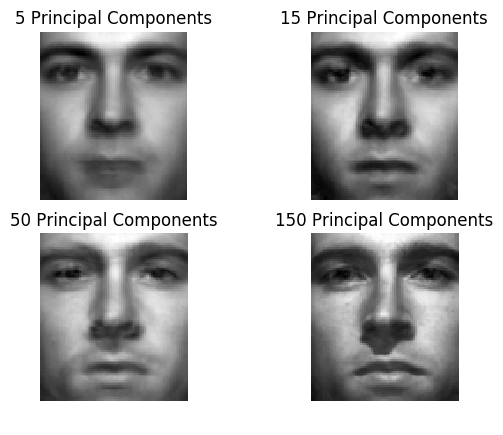

face index543


In [10]:
 # get a random face
  faceim = takeface(data,facedim,rand(1:N))

  # reconstruct the face with 5,15,50,150 principal components
  f5 = computereconstruction(faceim,U,mu,5)
  f15 = computereconstruction(faceim,U,mu,15)
  f50 = computereconstruction(faceim,U,mu,50)
  f150 = computereconstruction(faceim,U,mu,150)
  faceim=reshape(faceim,facedim[1]*facedim[2],1)+mu #adding mean back to get the original image
  faceim=reshape(faceim,facedim[1],facedim[2])

  displayfaces(f5,f15,f50,f150,faceim)
 


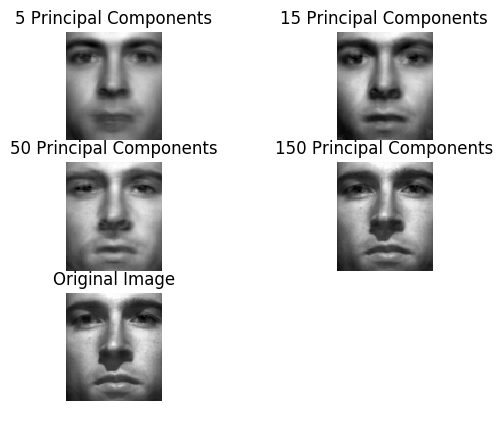

PyObject <matplotlib.text.Text object at 0x00000000388F6160>

In [12]:
 # display the reconstructed faces
  figure()
  subplot(321)
  imshow(f5,"gray",interpolation="none")
  axis("off")
  title("5 Principal Components")
  subplot(322)
  imshow(f15,"gray",interpolation="none")
  axis("off")
  title("15 Principal Components")
  subplot(323)
  imshow(f50,"gray",interpolation="none")
  axis("off")
  title("50 Principal Components")
  subplot(324)
  imshow(f150,"gray",interpolation="none")
  axis("off")
  title("150 Principal Components")
  gcf()
  subplot(325)
  imshow(faceim,"gray",interpolation="none")
  axis("off")
  title("Original Image")
  